In [1]:
import pandas as pd
import seaborn as sns
from lib.utils2 import topCorr
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv('./data/fullData.csv')
data

,OID_,Zonificacion_Project_ID,Zonificacion_Project_AREA,Zonificacion_Project_ID_NODO,Zonificacion_Project_CODIGO_MZ,Zonificacion_Project_MPIO,Zonificacion_Project_POB2005,Zonificacion_Project_POB2010,Zonificacion_Project_POB2000,Zonificacion_Project_POB2012,...,sum_VPH_STVP,sum_VPH_SPMVPI,sum_VPH_CVJ,sum_VPH_SINRTV,sum_VPH_SINLTC,sum_VPH_SINCINT,sum_VPH_SINTIC,Manzanas,Shape_Length,Shape_Area
0,1,353,0.66,23070,353,Tonal,950.0,1097.0,547.0,1262.91,...,138.0,43.0,33.0,3.0,18.0,159.0,3.0,24,3607.526676,6.623888e+05
1,2,352,34.44,23043,352,Tonal,0.0,12275.0,698.0,13150.56,...,8110.0,4344.0,3295.0,63.0,124.0,2818.0,9.0,679,51652.454849,3.434607e+07
2,3,205,136.13,1057,205,Juana,3696.0,3921.0,0.0,4015.00,...,1906.0,243.0,626.0,34.0,103.0,2911.0,6.0,189,69804.308059,1.357649e+08
3,4,486,15.55,23383,486,Ext,0.0,0.0,0.0,0.00,...,11.0,3.0,0.0,0.0,0.0,38.0,0.0,7,23686.125908,1.551020e+07
4,5,489,29.30,58088,489,Ext,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30956.690081,2.921773e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,474,158,0.51,27449,158,Guada,10146.0,9805.0,11184.0,9550.70,...,1036.0,591.0,409.0,6.0,30.0,544.0,0.0,50,3887.580099,5.073830e+05
474,475,165,0.67,12476,165,Guada,11694.0,10758.0,11516.0,10613.53,...,925.0,612.0,439.0,5.0,39.0,708.0,0.0,117,3999.969281,6.712400e+05
475,476,151,0.53,12445,151,Guada,6973.0,6734.0,7203.0,6643.93,...,709.0,404.0,234.0,0.0,3.0,361.0,0.0,77,3170.094251,5.261191e+05
476,477,492,74.37,20428,349,Tonal,16848.0,11736.0,1267.0,12573.11,...,7930.0,3128.0,2706.0,66.0,187.0,4627.0,12.0,674,72346.131999,7.416361e+07


Chgecamos cuales son las columnas conflictivas

In [6]:
cols = ['datosAgrupados_Total_destino', 'datosAgrupados_Total_origen',
        'datosAgrupados_Transporte_Colectivo_destino', 'datosAgrupados_Transporte_Colectivo_origen']
vars = 30

indexes = ['OID_', 'Join_Count', 'TARGET_FID', 'JOIN_FID', 
            'Zonificacion_Project_ID', 'Zonificacion_Project_AREA', 'Zonificacion_Project_ID_NODO', 'Zonificacion_Project_CODIGO_MZ',
            'datosAgrupados_OBJECTID', 'datosAgrupados_Ubicación', 'Join_ID', 'Join_ID_1', 'CODIGO_MZ', 'CODIGO_MZ_1'
            'CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_MZA', 'ENTIDAD']
validcols = cols + [i for i in data.columns if '_origen' not in i and '_destino' not in i and i not in indexes and 'Zonificacion' not in i]

correlacion spearman

In [4]:
corDf = data[validcols].corr('spearman')
corDf

,datosAgrupados_Total_destino,datosAgrupados_Total_origen,datosAgrupados_Transporte_Colectivo_destino,datosAgrupados_Transporte_Colectivo_origen,Unidades_Economicas,act_112511,act_112512,act_114119,act_115111,act_115113,...,sum_VPH_STVP,sum_VPH_SPMVPI,sum_VPH_CVJ,sum_VPH_SINRTV,sum_VPH_SINLTC,sum_VPH_SINCINT,sum_VPH_SINTIC,Manzanas,Shape_Length,Shape_Area
datosAgrupados_Total_destino,1.000000,0.999265,0.789544,0.785328,0.625306,0.066325,-0.096032,0.015661,0.082965,0.008274,...,0.426053,0.376722,0.387773,0.278139,0.190255,0.227876,0.017639,0.307008,-0.043976,0.008069
datosAgrupados_Total_origen,0.999265,1.000000,0.789969,0.786371,0.627874,0.065990,-0.097069,0.014470,0.083405,0.010982,...,0.424282,0.375016,0.385917,0.275949,0.190704,0.227774,0.017209,0.305703,-0.044757,0.007277
datosAgrupados_Transporte_Colectivo_destino,0.789544,0.789969,1.000000,0.987565,0.536403,0.074364,-0.124894,-0.051381,0.096967,0.012336,...,0.258654,0.254383,0.252040,0.172777,0.106408,0.123904,-0.023529,0.136925,-0.196805,-0.145219
datosAgrupados_Transporte_Colectivo_origen,0.785328,0.786371,0.987565,1.000000,0.543245,0.073359,-0.129108,-0.040453,0.093737,0.015646,...,0.263159,0.255077,0.255147,0.169151,0.122308,0.141484,-0.023455,0.150497,-0.188127,-0.138891
Unidades_Economicas,0.625306,0.627874,0.536403,0.543245,1.000000,-0.034894,-0.001408,0.084816,0.138004,-0.007273,...,0.329680,0.316852,0.301070,0.319567,0.245873,0.245749,0.116277,0.266956,-0.007184,0.068421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sum_VPH_SINCINT,0.227876,0.227774,0.123904,0.141484,0.245749,-0.035562,0.110611,0.041473,0.078440,0.069734,...,0.270979,0.020899,0.211094,0.416368,0.859104,1.000000,0.372319,0.581118,0.251648,0.221514
sum_VPH_SINTIC,0.017639,0.017209,-0.023529,-0.023455,0.116277,-0.022015,0.062963,0.105753,0.044862,0.011205,...,0.146779,0.071988,0.115312,0.513391,0.494471,0.372319,1.000000,0.236162,0.259793,0.259795
Manzanas,0.307008,0.305703,0.136925,0.150497,0.266956,-0.056435,0.113755,0.069954,0.101951,0.051590,...,0.577365,0.437116,0.530447,0.373254,0.377473,0.581118,0.236162,1.000000,0.567549,0.575402
Shape_Length,-0.043976,-0.044757,-0.196805,-0.188127,-0.007184,-0.047249,0.255054,0.127450,0.075524,0.101151,...,0.231086,0.149500,0.200999,0.267580,0.201209,0.251648,0.259793,0.567549,1.000000,0.950222


In [5]:
corDf.to_csv('./data/fullDataCorrWithoutZon.csv')

In [2]:
corr = pd.read_csv('./data/fullDataCorrWithoutZon.csv')
corr.set_index('Unnamed: 0', inplace = True)
corr

,datosAgrupados_Total_destino,datosAgrupados_Total_origen,datosAgrupados_Transporte_Colectivo_destino,datosAgrupados_Transporte_Colectivo_origen,Unidades_Economicas,act_112511,act_112512,act_114119,act_115111,act_115113,...,sum_VPH_STVP,sum_VPH_SPMVPI,sum_VPH_CVJ,sum_VPH_SINRTV,sum_VPH_SINLTC,sum_VPH_SINCINT,sum_VPH_SINTIC,Manzanas,Shape_Length,Shape_Area
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
datosAgrupados_Total_destino,1.000000,0.999265,0.789544,0.785328,0.625306,0.066325,-0.096032,0.015661,0.082965,0.008274,...,0.426053,0.376722,0.387773,0.278139,0.190255,0.227876,0.017639,0.307008,-0.043976,0.008069
datosAgrupados_Total_origen,0.999265,1.000000,0.789969,0.786371,0.627874,0.065990,-0.097069,0.014470,0.083405,0.010982,...,0.424282,0.375016,0.385917,0.275949,0.190704,0.227774,0.017209,0.305703,-0.044757,0.007277
datosAgrupados_Transporte_Colectivo_destino,0.789544,0.789969,1.000000,0.987565,0.536403,0.074364,-0.124894,-0.051381,0.096967,0.012336,...,0.258654,0.254383,0.252040,0.172777,0.106408,0.123904,-0.023529,0.136925,-0.196805,-0.145219
datosAgrupados_Transporte_Colectivo_origen,0.785328,0.786371,0.987565,1.000000,0.543245,0.073359,-0.129108,-0.040453,0.093737,0.015646,...,0.263159,0.255077,0.255147,0.169151,0.122308,0.141484,-0.023455,0.150497,-0.188127,-0.138891
Unidades_Economicas,0.625306,0.627874,0.536403,0.543245,1.000000,-0.034894,-0.001408,0.084816,0.138004,-0.007273,...,0.329680,0.316852,0.301070,0.319567,0.245873,0.245749,0.116277,0.266956,-0.007184,0.068421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sum_VPH_SINCINT,0.227876,0.227774,0.123904,0.141484,0.245749,-0.035562,0.110611,0.041473,0.078440,0.069734,...,0.270979,0.020899,0.211094,0.416368,0.859104,1.000000,0.372319,0.581118,0.251648,0.221514
sum_VPH_SINTIC,0.017639,0.017209,-0.023529,-0.023455,0.116277,-0.022015,0.062963,0.105753,0.044862,0.011205,...,0.146779,0.071988,0.115312,0.513391,0.494471,0.372319,1.000000,0.236162,0.259793,0.259795
Manzanas,0.307008,0.305703,0.136925,0.150497,0.266956,-0.056435,0.113755,0.069954,0.101951,0.051590,...,0.577365,0.437116,0.530447,0.373254,0.377473,0.581118,0.236162,1.000000,0.567549,0.575402


In [7]:
x, y = topCorr(cols, vars, corr.drop(cols))

Top 30 de correlacion con: datosAgrupados_Total_destino
Unnamed: 0
Unidades_Economicas    0.625306
act_812110             0.585992
sum_P_60YMAS           0.579901
sum_P_60YMAS_M         0.578777
sum_P_60YMAS_F         0.572892
act_722514             0.569120
act_722515             0.559835
sum_POB65_MAS          0.555954
sum_P12YM_SEPA         0.539909
act_463211             0.521281
act_465311             0.512494
sum_HOGJEF_F           0.509512
act_722513             0.497936
sum_P12YM_SOLT         0.494466
sum_VPH_TELEF          0.489860
sum_VPH_AEASP          0.488582
Paradas_Camion         0.486902
sum_VPH_TINACO         0.486658
act_464111             0.485795
act_722517             0.483822
sum_PCLIM_PMEN         0.483368
sum_VPH_INTER          0.476707
act_461160             0.476654
sum_PCLIM_CSB          0.475873
sum_POCUPADA_F         0.474832
sum_PEA_F              0.474607
sum_P_18YMAS_F         0.473736
act_464113             0.472218
sum_VPH_3YMASC         0.471504
sum_V

In [8]:
y.isna().sum()

datosAgrupados_Total_destino                   12
datosAgrupados_Total_origen                    12
datosAgrupados_Transporte_Colectivo_destino    12
datosAgrupados_Transporte_Colectivo_origen     12
dtype: int64

<AxesSubplot:xlabel='Unnamed: 0'>

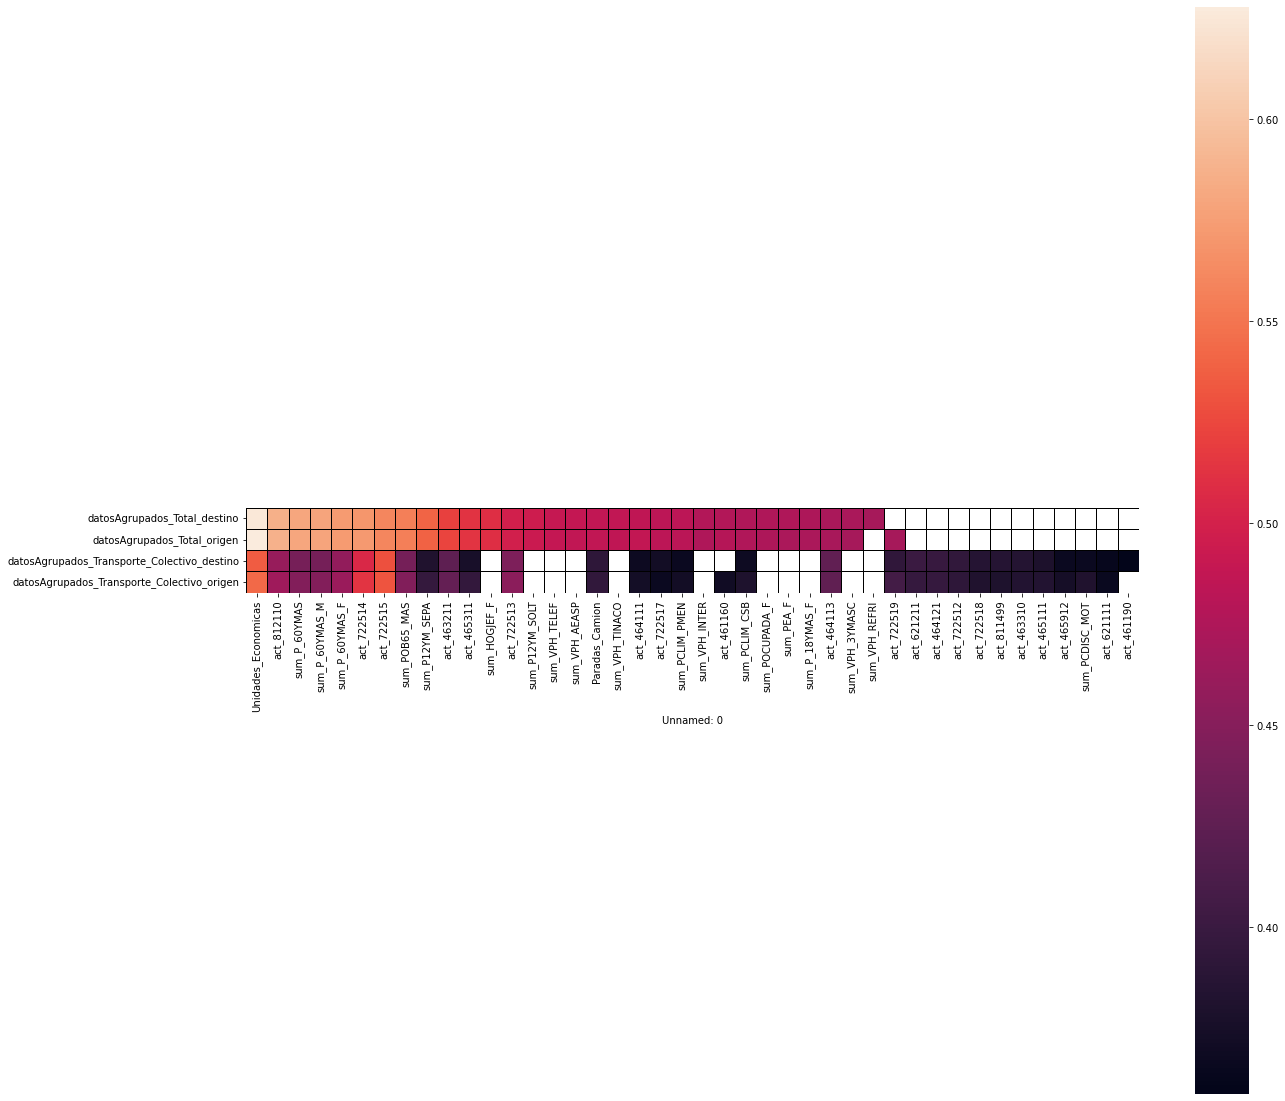

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(y.T, square=True, linewidths=1, linecolor='black')

- top 15 de variables

In [10]:
z = y.fillna(0).T.sum().sort_values(ascending=False)[0:15]
z

Unnamed: 0
Unidades_Economicas    2.332827
act_722515             2.181035
act_722514             2.159741
act_812110             2.097794
sum_P_60YMAS_F         2.065628
sum_P_60YMAS           2.046935
sum_P_60YMAS_M         2.043356
sum_POB65_MAS          1.997208
act_463211             1.897058
act_722513             1.892081
sum_P12YM_SEPA         1.856063
act_465311             1.797479
act_464113             1.795606
Paradas_Camion         1.758959
act_464111             1.713747
dtype: float64

In [11]:
selectedVars = z.index.to_list()
selectedVars

['Unidades_Economicas',
 'act_722515',
 'act_722514',
 'act_812110',
 'sum_P_60YMAS_F',
 'sum_P_60YMAS',
 'sum_P_60YMAS_M',
 'sum_POB65_MAS',
 'act_463211',
 'act_722513',
 'sum_P12YM_SEPA',
 'act_465311',
 'act_464113',
 'Paradas_Camion',
 'act_464111']

In [14]:
selectedVars = ['sum_POBTOT', 
                'act_722515', 'act_722514', 'act_812110', 'Unidades_Economicas',
                'Paradas_Camion',
                'sum_VPH_AUTOM', 'sum_TVIVPARHAB']

In [15]:
selectedData = data[['CODIGO_MZ', 'datosAgrupados_Total_destino', 'datosAgrupados_Total_origen'] + selectedVars].set_index('CODIGO_MZ').fillna(0)
selectedData

,datosAgrupados_Total_destino,datosAgrupados_Total_origen,sum_POBTOT,act_722515,act_722514,act_812110,Unidades_Economicas,Paradas_Camion,sum_VPH_AUTOM,sum_TVIVPARHAB
CODIGO_MZ,,,,,,,,,,
353,5118.0,5118.0,1541.0,0.0,2.0,0.0,88,9,194.0,368.0
352,794.0,794.0,46710.0,1.0,2.0,29.0,305,67,8598.0,13562.0
205,11301.0,11301.0,17780.0,0.0,0.0,0.0,18,0,1924.0,5097.0
486,4179.0,4179.0,196.0,0.0,0.0,0.0,3,0,24.0,53.0
489,781.0,781.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
158,21667.0,21435.0,8937.0,9.0,14.0,18.0,354,18,1209.0,2356.0
165,16864.0,16864.0,10644.0,9.0,22.0,56.0,590,27,1534.0,2664.0
151,15936.0,15936.0,5937.0,5.0,9.0,12.0,235,5,895.0,1592.0


In [16]:
selectedData['%VPH_AUTOMOVIL'] = selectedData['sum_VPH_AUTOM']/selectedData['sum_TVIVPARHAB']
selectedData.drop(columns=['sum_VPH_AUTOM', 'sum_TVIVPARHAB'], inplace=True)
selectedData.fillna(0, inplace = True)
selectedData

,datosAgrupados_Total_destino,datosAgrupados_Total_origen,sum_POBTOT,act_722515,act_722514,act_812110,Unidades_Economicas,Paradas_Camion,%VPH_AUTOMOVIL
CODIGO_MZ,,,,,,,,,
353,5118.0,5118.0,1541.0,0.0,2.0,0.0,88,9,0.527174
352,794.0,794.0,46710.0,1.0,2.0,29.0,305,67,0.633977
205,11301.0,11301.0,17780.0,0.0,0.0,0.0,18,0,0.377477
486,4179.0,4179.0,196.0,0.0,0.0,0.0,3,0,0.452830
489,781.0,781.0,0.0,0.0,0.0,0.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...
158,21667.0,21435.0,8937.0,9.0,14.0,18.0,354,18,0.513158
165,16864.0,16864.0,10644.0,9.0,22.0,56.0,590,27,0.575826
151,15936.0,15936.0,5937.0,5.0,9.0,12.0,235,5,0.562186


In [17]:
selectedData.to_csv('./data/selectedDataV2.csv')

In [18]:
toDummy = pd.read_csv('./data/selectedDataV2.csv')
toDummy

,CODIGO_MZ,datosAgrupados_Total_destino,datosAgrupados_Total_origen,sum_POBTOT,act_722515,act_722514,act_812110,Unidades_Economicas,Paradas_Camion,%VPH_AUTOMOVIL
0,353,5118.0,5118.0,1541.0,0.0,2.0,0.0,88,9,0.527174
1,352,794.0,794.0,46710.0,1.0,2.0,29.0,305,67,0.633977
2,205,11301.0,11301.0,17780.0,0.0,0.0,0.0,18,0,0.377477
3,486,4179.0,4179.0,196.0,0.0,0.0,0.0,3,0,0.452830
4,489,781.0,781.0,0.0,0.0,0.0,0.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
473,158,21667.0,21435.0,8937.0,9.0,14.0,18.0,354,18,0.513158
474,165,16864.0,16864.0,10644.0,9.0,22.0,56.0,590,27,0.575826
475,151,15936.0,15936.0,5937.0,5.0,9.0,12.0,235,5,0.562186
476,349,35671.0,35671.0,62203.0,3.0,14.0,29.0,490,73,0.533891


In [19]:
dummies = pd.get_dummies(toDummy['CODIGO_MZ'])
dummies

,1,2,3,4,5,6,7,8,9,10,...,469,470,471,484,485,486,487,488,489,490
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
withDummy = pd.concat([toDummy, dummies], axis = 1).set_index('CODIGO_MZ')
withDummy

,datosAgrupados_Total_destino,datosAgrupados_Total_origen,sum_POBTOT,act_722515,act_722514,act_812110,Unidades_Economicas,Paradas_Camion,%VPH_AUTOMOVIL,1,...,469,470,471,484,485,486,487,488,489,490
CODIGO_MZ,,,,,,,,,,,,,,,,,,,,,
353,5118.0,5118.0,1541.0,0.0,2.0,0.0,88,9,0.527174,0,...,0,0,0,0,0,0,0,0,0,0
352,794.0,794.0,46710.0,1.0,2.0,29.0,305,67,0.633977,0,...,0,0,0,0,0,0,0,0,0,0
205,11301.0,11301.0,17780.0,0.0,0.0,0.0,18,0,0.377477,0,...,0,0,0,0,0,0,0,0,0,0
486,4179.0,4179.0,196.0,0.0,0.0,0.0,3,0,0.452830,0,...,0,0,0,0,0,1,0,0,0,0
489,781.0,781.0,0.0,0.0,0.0,0.0,0,0,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,21667.0,21435.0,8937.0,9.0,14.0,18.0,354,18,0.513158,0,...,0,0,0,0,0,0,0,0,0,0
165,16864.0,16864.0,10644.0,9.0,22.0,56.0,590,27,0.575826,0,...,0,0,0,0,0,0,0,0,0,0
151,15936.0,15936.0,5937.0,5.0,9.0,12.0,235,5,0.562186,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
withDummy.to_csv('./data/selectedDataV2_WithDummies.csv')